YOUR FULL NAME

 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [68]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [69]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [70]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [71]:
# Your code here. Add cells as needed.
#Fit a Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Model parameters:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
#Model MSE and R^2:
print("MSE:", mse)
print("R^2:", r2)

Coefficients: [21.77836877 21.38322267 95.94824862  6.60906581 48.85066402]
Intercept: -6.892090939486281
MSE: 95.56673921318745
R^2: 0.9929023914034346


#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?
 - 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

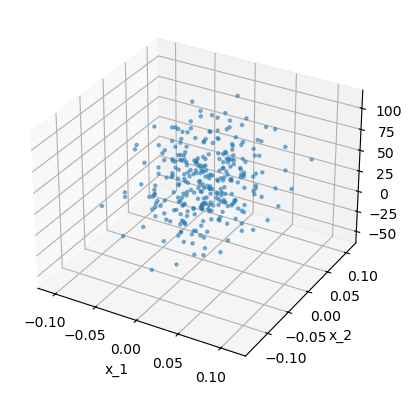

model coefficients: [  28.61892489   90.53869148   92.5950594   -98.80584057   83.82826039
   43.89351047   90.27998309    5.33892648   31.45693222 -100.23291342], 32.38238697047781
MSE_test = 965.02, MSE_train = 954.73
R2_test = -0.15, R2_train = 0.07

Best-fit Model:
	y = 32.38 + 28.62*x_1 + 90.54*x_2


In [72]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)


Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1,1)
X = np.hstack((X, Xa))
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

# Uncomment the line below for an interactive figure
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:,0], X[:,1], y, s=5, alpha = 0.5)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)

# Create and train the model
model_LR = sk.linear_model.LinearRegression()
model_LR.fit(X_train, y_train)

# Make predictions
y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)
y_pred = model_LR.predict(X)

# Assess the model
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_LR.score(X_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_LR.score(X_test, y_test)


print(f'model coefficients: {model_LR.coef_}, {model_LR.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

model_LR.__dict__

print(f'\nBest-fit Model:\n\ty = {model_LR.intercept_:.2f} + {model_LR.coef_[0]:.2f}*x_1 + {model_LR.coef_[1]:.2f}*x_2')

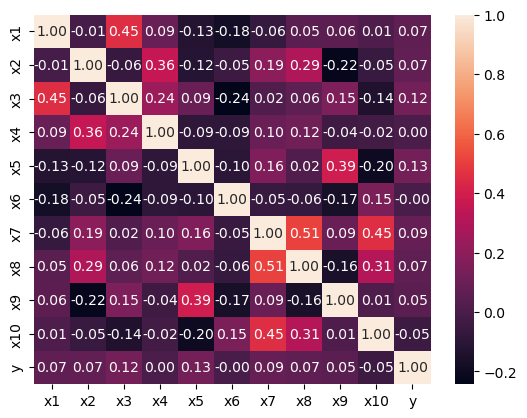

In [73]:
corr = reg2_df.corr()
sns.heatmap(corr, annot=True, fmt = ".2f")
plt.show()

In [74]:
candidate_idx = [0,1,2,3,4,5,9]
Z = X[:, candidate_idx ]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names

Z_train, Z_test, y_train, y_test = sk.model_selection.train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)


R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2_train = {R2_train:.2f}, R2_test = {R2_test:.2f}')

R2_train = 0.05, R2_test = -0.15


In [75]:
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Best-fit Model')

True Model:
 y = 32.49 + 62.21*x1 + 23.11*x2 + 75.07*x3 + 16.59*x4 + 75.65*x5 + 86.86*x6
Best-fit Model:
 y = 33.25 + -0.40*x1 + 86.35*x2 + 131.85*x3 + -57.14*x4 + 98.59*x5 + 63.38*x6 + -46.11*x10


In [76]:
model_LR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 7,
 'coef_': array([ -0.4002722 ,  86.34691887, 131.84893917, -57.1370867 ,
         98.58947033,  63.38411666, -46.11428518]),
 'rank_': 7,
 'singular_': array([0.77575127, 0.74523036, 0.63589692, 0.55235557, 0.46484399,
        0.43509572, 0.37204214]),
 'intercept_': 33.2482657012808}

#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - 
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [77]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


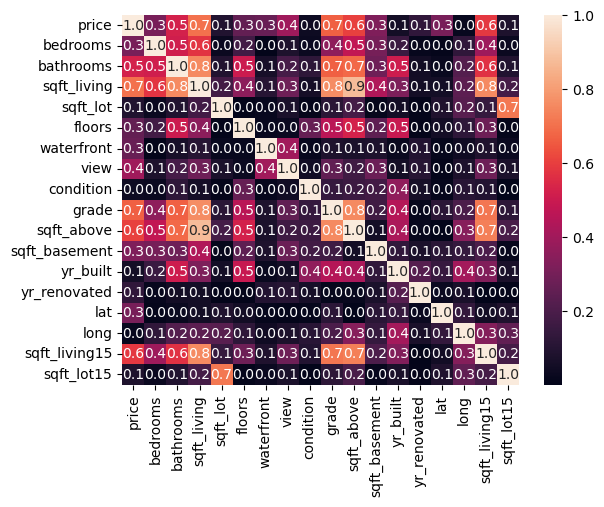

In [78]:
# bedrooms, sqft_living and floors
# Your code here. Add cells as needed
housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
corr = housing_df.corr()
sns.heatmap(np.abs(corr), annot=True, fmt = ".1f")
plt.show()



In [79]:
X = housing_df[['bedrooms', 'sqft_living', 'floors']]
Y = housing_df[('price')] 

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2)


In [80]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

LinearRegression()

In [81]:
y = housing_df['price']
X = housing_df.drop(columns=['price'])

from sklearn.linear_model import Lasso
#play with alpha - missing steps to fill in
model_lasso = Lasso(alpha=1.0)


In [82]:
# Select three features
X_a = housing_df[['bedrooms', 'sqft_living', 'floors']]
y_a = housing_df['price']

# Train-test split
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(
    X_a, y_a, test_size=0.2
)

# Scale data
scaler_a = StandardScaler()
scaler_a.fit(X_a_train)
X_a_train_scaled = scaler_a.transform(X_a_train)
X_a_test_scaled = scaler_a.transform(X_a_test)

# Fit Linear Regression
linreg = LinearRegression()
linreg.fit(X_a_train_scaled, y_a_train)

# Evaluate
r2_train_a = linreg.score(X_a_train_scaled, y_a_train)
r2_test_a = linreg.score(X_a_test_scaled, y_a_test)

print("Linear Regression with 3 features:")
print("Training R^2:", r2_train_a)
print("Test R^2:", r2_test_a)


Linear Regression with 3 features:
Training R^2: 0.5098949967152622
Test R^2: 0.49315227721023014


#### Your written answers here
Which features are you using and why?
 
 - I selected the following three features for multiple linear regression: Bedrooms, Sqft_living, Floors. I chose these features based on their correlation with price as observed in the heatmap. Sqft_living has strongest positive correlation with price (0.7), while the other variables also have moderate correlation with price (~0.3 - 0.35).

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 


Lasso Regression with all features:
Training R^2: 0.6926226766664947
Test R^2: 0.7060982809287079

Top 3 features (by coefficient):
sqft_above: coefficient = -82341.277
grade: coefficient = 115136.007
sqft_living: coefficient = 261315.502


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.311e+13, tolerance: 2.367e+11
  model = cd_fast.enet_coordinate_descent(


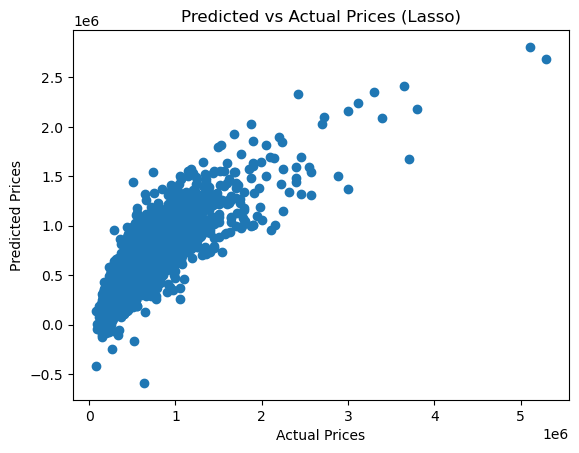

In [83]:
# Your code here. Add cells as needed.
# Drop columns: price (target), date, and zipcode
housing_b = housing_df.copy() 

# Save feature names for later reference
feature_names = housing_b.drop(columns=['price']).columns

# Define X and y
X_b = housing_b.drop(columns=['price']) 
y_b = housing_b['price']

# Train-test split
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(
    X_b, y_b, test_size=0.2
)

# Scale
scaler_b = StandardScaler()
scaler_b.fit(X_b_train)
X_b_train_scaled = scaler_b.transform(X_b_train)
X_b_test_scaled = scaler_b.transform(X_b_test)

# Fit Lasso Regression
model_b = Lasso(alpha=1.0)
model_b.fit(X_b_train_scaled, y_b_train)

# Evaluate
r2_train_b = model_b.score(X_b_train_scaled, y_b_train)
r2_test_b = model_b.score(X_b_test_scaled, y_b_test)

print("\nLasso Regression with all features:")
print("Training R^2:", r2_train_b)
print("Test R^2:", r2_test_b)

# Identify the 3 largest (absolute) coefficients
coefs = np.abs(model_b.coef_)
top_3_idx = np.argsort(coefs)[-3:]  # indices of the 3 largest abs values

print("\nTop 3 features (by coefficient):")
for idx in top_3_idx:
    print(f"{feature_names[idx]}: coefficient = {model_b.coef_[idx]:.3f}")

# Plot predicted vs actual for the test set
y_b_pred = model_b.predict(X_b_test_scaled)
plt.scatter(y_b_test, y_b_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Lasso)")
plt.show()



### Your written answers here
Which regression did you use?
 - I used Lasso Regression 

Does your regularized model look better than your MLR? How so?
 - Yes, the regularized model appears to perform better than the MLR. The Test R^2 is 0.7059, slightly higher than the training R^2 (0.6929), indicating that the model generalizes well without significant overfitting.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>


Ridge Regression:
Below $1M:
  Train R^2: 0.6888708530504537
  Test R^2:  0.6809722012704476

Above $1M:
  Train R^2: 0.5186348991807793
  Test R^2:  0.535509348346514


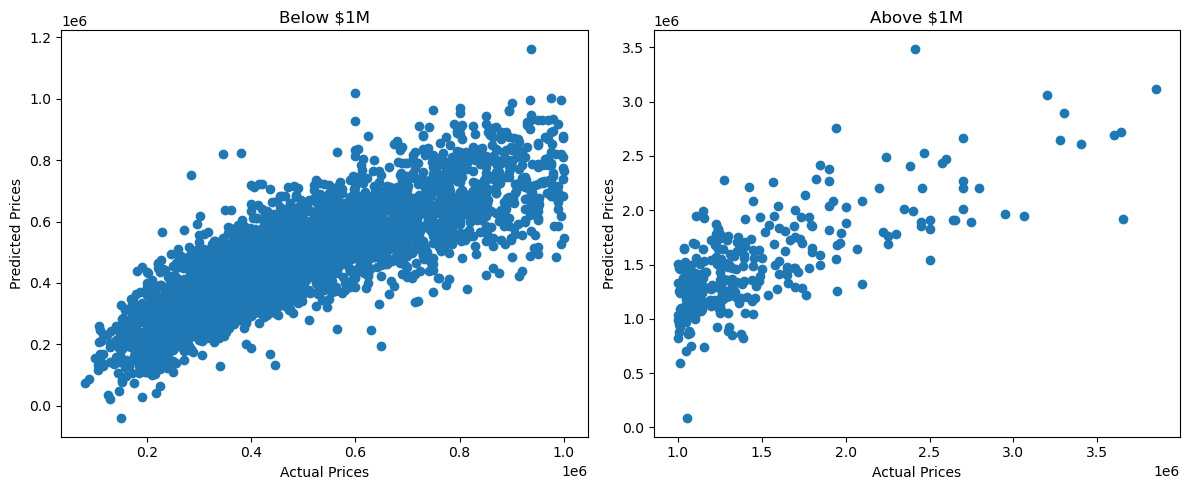

In [84]:
# Your code here. Add cells as needed.
from sklearn.linear_model import Ridge
# Split into below 1M and above/equal 1M
housing_below_1m = housing_df[housing_df['price'] < 1000000].copy()
housing_above_1m = housing_df[housing_df['price'] >= 1000000].copy()

# Define X and y for both datasets
X_below = housing_below_1m.drop(columns=['price'])  # Drop only 'price'
y_below = housing_below_1m['price']

X_above = housing_above_1m.drop(columns=['price'])  # Drop only 'price'
y_above = housing_above_1m['price']

# Train-test split
X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(
    X_below, y_below, test_size=0.2
)
X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(
    X_above, y_above, test_size=0.2
)

# Scale each subset separately
scaler_below = StandardScaler()
scaler_below.fit(X_below_train)
X_below_train_scaled = scaler_below.transform(X_below_train)
X_below_test_scaled = scaler_below.transform(X_below_test)

scaler_above = StandardScaler()
scaler_above.fit(X_above_train)
X_above_train_scaled = scaler_above.transform(X_above_train)
X_above_test_scaled = scaler_above.transform(X_above_test)

# Fit Ridge Regression for below 1M
model_below = Ridge(alpha=0.1)
model_below.fit(X_below_train_scaled, y_below_train)

r2_below_train = model_below.score(X_below_train_scaled, y_below_train)
r2_below_test = model_below.score(X_below_test_scaled, y_below_test)

# Fit Ridge Regression for above 1M
model_above = Ridge(alpha=0.1)
model_above.fit(X_above_train_scaled, y_above_train)

r2_above_train = model_above.score(X_above_train_scaled, y_above_train)
r2_above_test = model_above.score(X_above_test_scaled, y_above_test)

print("\nRidge Regression:")

print("Below $1M:")
print("  Train R^2:", r2_below_train)
print("  Test R^2: ", r2_below_test)

print("\nAbove $1M:")
print("  Train R^2:", r2_above_train)
print("  Test R^2: ", r2_above_test)

# Plot predicted vs actual for both groups
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_below_test, model_below.predict(X_below_test_scaled))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Below $1M")


plt.subplot(1, 2, 2)
plt.scatter(y_above_test, model_above.predict(X_above_test_scaled))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Above $1M")

plt.tight_layout()
plt.show()



 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
